## Import Data

In [1]:
import pandas as pd

In [5]:
# Load the dataset with a different encoding
df = pd.read_csv('C:/Users/faree/Downloads/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1')

# Preview the first few rows of the dataset
df.head()


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## Data Preprocessing

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [9]:
import pandas as pd

# Define the column names
column_names = ['Sentiment', 'Tweet_ID', 'Date', 'Query', 'Username', 'Text']

# Load the dataset with the specified column names
df = pd.read_csv('C:/Users/faree/Downloads/training.1600000.processed.noemoticon.csv', 
                 encoding='ISO-8859-1', 
                 names=column_names, 
                 header=None)

# Preview the first few rows of the dataset
df.head()


,Sentiment,Tweet_ID,Date,Query,Username,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stop words
stop_words = set(stopwords.words('english'))

# Function for cleaning and preprocessing the text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove user @ references and hashtags
    text = re.sub(r'\@\w+|\#', '', text)
    
    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stop words
    filtered_words = [word for word in tokens if word not in stop_words]
    
    # Join the tokens back into a single string
    return " ".join(filtered_words)

# Apply preprocessing to the 'Text' column
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

# Preview the cleaned text
df[['Text', 'Cleaned_Text']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\faree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\faree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Cleaned_Text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save 50 rest go ...
3,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


## Sentimental Analysis

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [12]:
# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    sentiment_dict = sid.polarity_scores(text)
    return sentiment_dict['compound']

# Apply sentiment analysis to the cleaned text
df['Sentiment_Score'] = df['Cleaned_Text'].apply(get_sentiment)

# Categorize sentiment as positive, negative, or neutral
df['Sentiment'] = df['Sentiment_Score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# Preview the sentiment scores and categories
df[['Cleaned_Text', 'Sentiment_Score', 'Sentiment']].head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\faree\AppData\Roaming\nltk_data...


,Cleaned_Text,Sentiment_Score,Sentiment
0,thats bummer shoulda got david carr third day,-0.3818,negative
1,upset cant update facebook texting might cry r...,-0.7269,negative
2,dived many times ball managed save 50 rest go ...,0.4939,positive
3,whole body feels itchy like fire,-0.2500,negative
4,behaving im mad cant see,-0.4939,negative


## Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\faree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\faree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\faree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

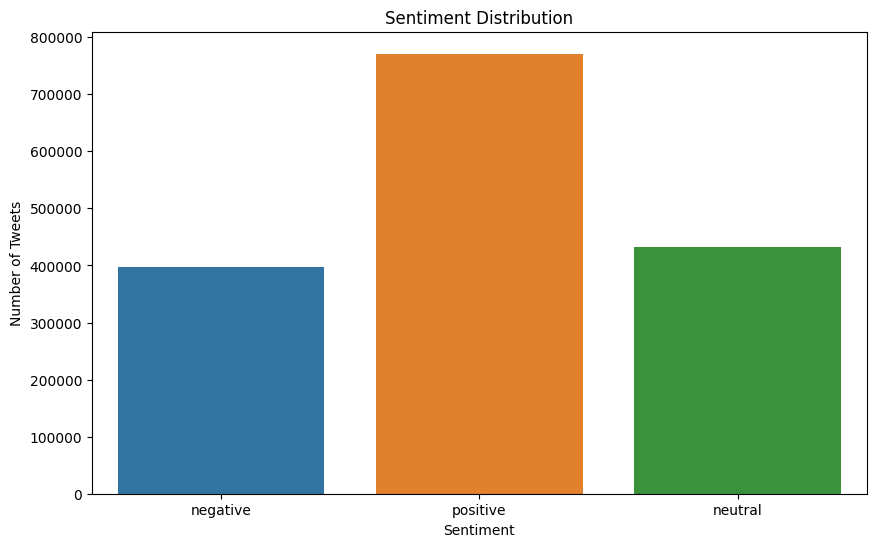

In [14]:
# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

C:\Users\faree\AppData\Local\Temp\ipykernel_30944\3488884073.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


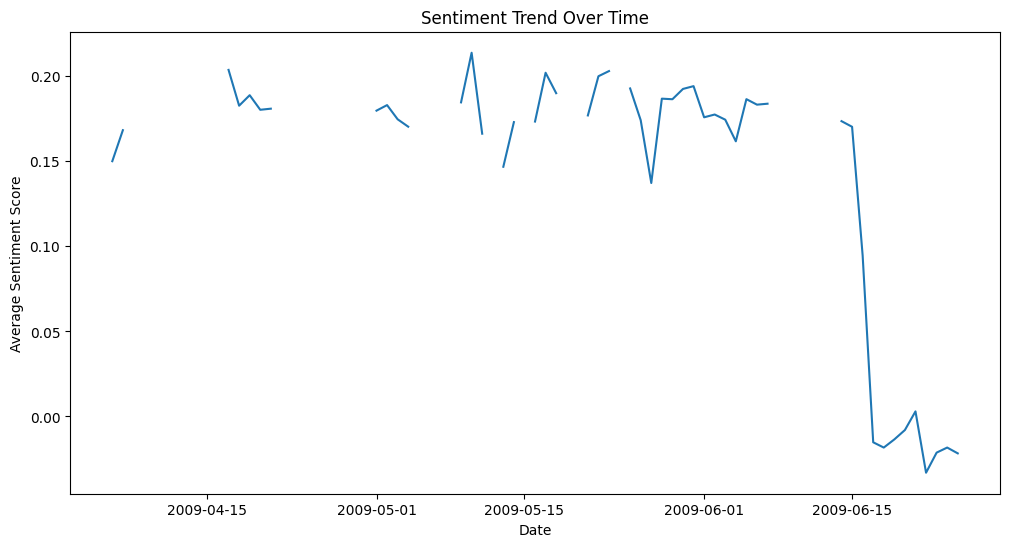

In [15]:
# Ensure the Date column is in datetime format (if applicable)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Set the Date as the index (if analyzing over time)
df.set_index('Date', inplace=True)

# Resample by day to get daily sentiment counts (optional, based on your dataset)
daily_sentiment = df.resample('D').apply({'Sentiment_Score': 'mean'})

# Plot the sentiment trend over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment.index, daily_sentiment['Sentiment_Score'])
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.show()


In [16]:
# Group by username and calculate the mean sentiment score for each user
user_sentiment = df.groupby('Username')['Sentiment_Score'].mean().reset_index()

# Sort by sentiment score to see the most positive or negative users
user_sentiment_sorted = user_sentiment.sort_values(by='Sentiment_Score', ascending=False)

# Preview the top users with the most positive sentiment
print(user_sentiment_sorted.head(10))

# Preview the top users with the most negative sentiment
print(user_sentiment_sorted.tail(10))


               Username  Sentiment_Score
506903        mkshine09          0.98870
433055  jumana_engineer          0.98595
567742    rupydetequila          0.98540
134433           Lkaati          0.98430
317349           cj_mac          0.98400
587429          silver7          0.98360
484051      mando_betty          0.98250
147292          McAnita          0.97960
656325   yourlovesong17          0.97950
495177      melandnessa          0.97810
               Username  Sentiment_Score
514479        mummy2751          -0.9729
110906           KFay91          -0.9732
546139        poke__egg          -0.9744
535356          otta327          -0.9750
453684        krissy25d          -0.9756
162046           Mwissa          -0.9756
343843         doegurly          -0.9774
283078          beccalh          -0.9792
360211      erynmariex3          -0.9806
470940  liveloveperform          -0.9899
